In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
from sklearn.datasets import make_classification

In [22]:
X,Y=make_classification(n_classes=2,n_samples=400,n_clusters_per_class=1,random_state=3,n_features=2,n_informative=2,n_redundant=0)

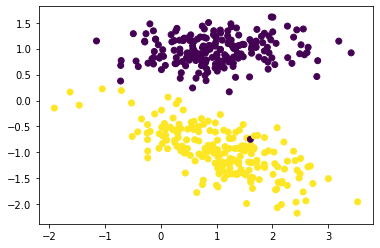

In [26]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [185]:
Y[Y==0]=-1
print(Y)

###########earlier Y was 0 or 1 by this technique we made it -1 or 1..............


[-1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1 -1
 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1  1
  1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1
 -1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1 -1
  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1
  1  1 -1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1  1
  1  1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1
 -1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1
 -1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1
  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1
  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1
 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1
  1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1

In [111]:
class SVM:
    
    def __init__(self,C=1.0):
        self.C=C
        self.W=0
        self.b=0
        
    def hindgeloss(self,W,b,X,Y):
        loss=0.0
        
        loss+=0.5*np.dot(W,W.T)
        
        m=X.shape[0]
        
        for i in range(m):
            ti=Y[i]*(np.dot(W,X[i].T)+b)
            loss+=self.C*max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.0001,maxItr=100):
        no_of_samples = X.shape[0]
        no_of_features = X.shape[1]
        
        n=learning_rate
        c=self.C
        
        W=np.zeros((1,no_of_features))
        bias=0.0
        
#         print(self.hindgeloss(W,bias,X,Y))
        
        
    
        losses=[]
        for i in range(maxItr):
            
            
            l=self.hindgeloss(W,bias,X,Y)
            losses.append(l)
            ids=np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            for batch_start in range(0,no_of_samples,batch_size):
                gradw=0.0
                gradb=0.0
                for j in range (batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i=ids[j]
                        ti=Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw+=0
                            gradb+=0
                        
                        else:
                            gradw+=c*Y[i]*X[i]
                            gradb+=c*Y[i]
                            
                            
                W=W-n*W+n*gradw
                bias=bias+n*gradb
    
        self.W=W
        self.b=bias
        return W,bias,losses
                        
                        
                        
                        
                    
                    
                    
        
        

In [112]:
mysvm=SVM()

In [178]:
W,b,losses=mysvm.fit(X,Y,maxItr=100)
print(losses)
print(losses[-1])

[400.0, 385.05588823796677, 370.11926284499214, 355.19011223847815, 340.2683775307953, 325.3541402017116, 310.4474018666898, 295.54809838142313, 280.65628355675824, 265.7717858823373, 250.89475244131603, 236.02520094739555, 221.20086031286795, 206.75461724106978, 192.97600484404737, 179.29095694300142, 166.2356947127297, 153.8396986805475, 142.35689557091553, 131.64006845929387, 122.3129834750477, 114.00660796521127, 106.6179470835628, 100.04038144391136, 94.29389752684969, 89.4408950509058, 85.21308925512876, 81.39301300872974, 78.2122851083723, 75.2792276730296, 72.56780902486446, 70.04338110492812, 67.73119395392797, 65.5248395797314, 63.498652973810714, 61.63625473628107, 59.9503877832456, 58.36932966942363, 56.89679257496796, 55.55231535383503, 54.26432763613077, 53.07844653063739, 51.97918077666227, 50.96908615052341, 50.03846080686052, 49.172054911613245, 48.34901914011823, 47.554907573310466, 46.80591376919668, 46.09576284013323, 45.43314707873649, 44.79713033471194, 44.1832170

TypeError: imshow() missing 1 required positional argument: 'X'

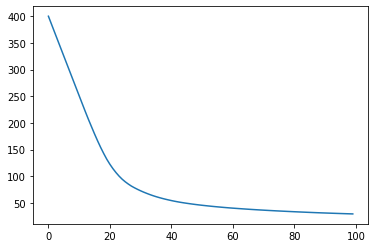

In [179]:
plt.plot(losses)
plt.imshow()

In [180]:
W,B=mysvm.W,mysvm.b

In [181]:
print(W,B)

[[-0.07053589 -1.4396761 ]] 0.08829999999999999


In [182]:
def drawhyperplane(w1,w2,b):
    plt.figure(figsize=(12,12))
    x_1=np.linspace(-2,4,10)
    x_2=-(w1*x_1+b)/w2
    
    plt.plot(x_1,x_2)
    
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.show()

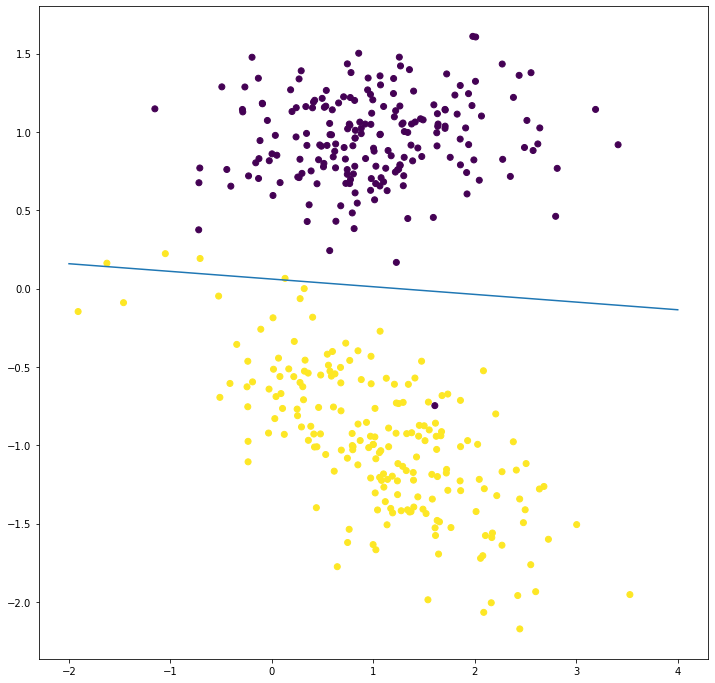

In [183]:
drawhyperplane(W[0,0],W[0,1],B)